In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys


from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [12]:
target_term = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

compound_list = []
positive_list = []
negative_list = []
neutral_list = []
sentiments = []
name = []
tweets_time = []


for term in target_term:
    tweet_collection = api.user_timeline(term,count=500,result_type='recent')
    tweets_ago = 1
    for tweet in tweet_collection:
        
        results = analyzer.polarity_scores(tweet["text"])
        compound_list.append(results["compound"])
        positive_list.append(results["pos"])
        negative_list.append(results["neg"])
        neutral_list.append(results["neu"])
        name.append(tweet['user']['name'])
        tweets_time.append(tweets_ago)
        tweets_ago = tweets_ago + 1

In [13]:
result_df = pd.DataFrame({'Name':name,
                          'Compound Score':compound_list,
                          'Positive Score':positive_list,
                          'Negative List':negative_list,
                         'Neutral List':neutral_list,
                         'Tweets Ago':tweets_time})

names = result_df['Name'].unique()
name_range = np.arange(0,len(names),1)



BBC = result_df[result_df['Name'] == 'BBC']
CBS = result_df[result_df['Name'] == 'CBS']
CNN = result_df[result_df['Name'] == 'CNN']
FoxNews = result_df[result_df['Name'] == 'Fox News']
NYtimes = result_df[result_df['Name'] == 'The New York Times']


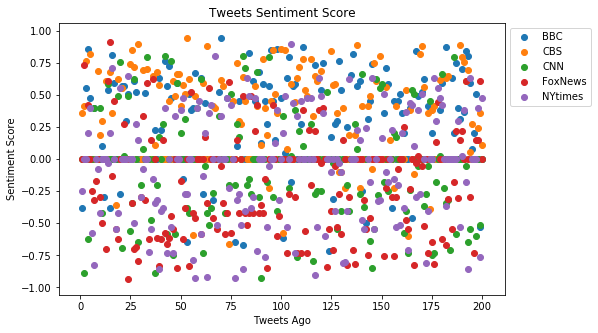

In [14]:

plt.figure(figsize=(8,5))
plt.scatter(BBC['Tweets Ago'],BBC['Compound Score'],label='BBC')
plt.scatter(CBS['Tweets Ago'],CBS['Compound Score'], label = 'CBS')
plt.scatter(CNN['Tweets Ago'],CNN['Compound Score'],label = 'CNN')
plt.scatter(FoxNews['Tweets Ago'],FoxNews['Compound Score'],label = 'FoxNews')
plt.scatter(NYtimes['Tweets Ago'],NYtimes['Compound Score'],label = 'NYtimes')

plt.xlabel('Tweets Ago')
plt.ylabel('Sentiment Score')
plt.title('Tweets Sentiment Score')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

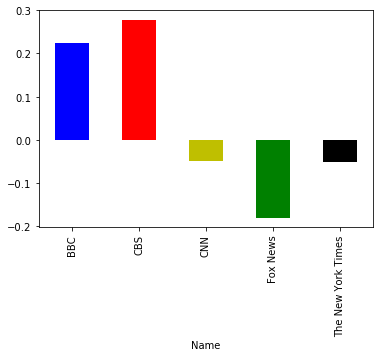

In [15]:
result_df.groupby(['Name'])['Compound Score'].mean().plot(kind='bar', color = ['b','r','y','g','black'])
plt.show()